$$\require{mhchem}$$

## Test CASE - $\ce{LiN2}$

In this example, search for $\ce{LiN2}$ using DFT and M3GNet. 

This hypothetical compound has not be reported experimentally and there is no data in the Materials Project data base (as of March 2023).

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    

import warnings
from pathlib import Path
from ase.io import read
import ase
import pandas as pd

from tqdm import tqdm

In [2]:
def load_dataset(names):
    cells = [read(x) for x in  tqdm(names)]
    for atoms, name in zip(cells, input_names):
        atoms.info['fname'] = name.stem

    dataset = []
    for atoms in cells:
        dataset.append(
        {
            'atoms': atoms,
            'label': atoms.info['fname'],
            'energy': atoms.info['energy'],
            'energy_per_atom': atoms.info['energy'] / len(atoms),
            'volume': atoms.get_volume(),
            'volume_per_atom': atoms.get_volume() / len(atoms),

        }
        )

    return pd.DataFrame(dataset).sort_values('energy_per_atom')

Load calculated data

In [3]:
input_names = list(Path("lin2/run1/").glob("*.res"))
df_dft = load_dataset(input_names)

input_names = list(Path("lin2/run1-m3gnet/").glob("*.res"))
df_m3g = load_dataset(input_names)

input_names = list(Path("lin2/run1-relaxed-m3gnet").glob("*.res"))
df_m3g_from_relaxed = load_dataset(input_names)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 1731.89it/s]


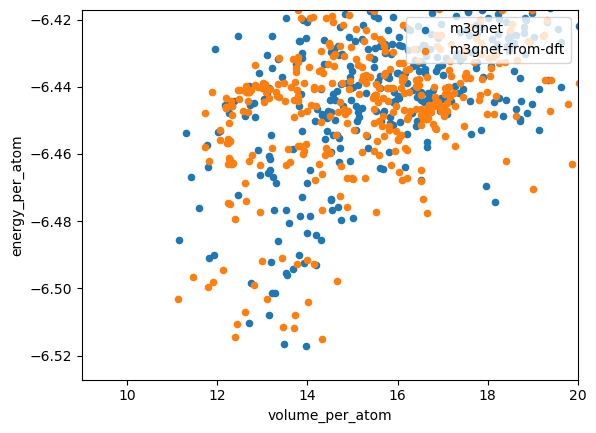

In [4]:
ax = df_m3g.plot.scatter('volume_per_atom', 'energy_per_atom', label='m3gnet')
ax = df_m3g_from_relaxed.plot.scatter('volume_per_atom', 'energy_per_atom',  xlim=(9, 20), label='m3gnet-from-dft', ax=ax, color='C1')
ax.set_ylim(df_m3g.energy_per_atom.min() - 0.01, df_m3g.energy_per_atom.min() + 0.1)
ax.legend(loc=1)

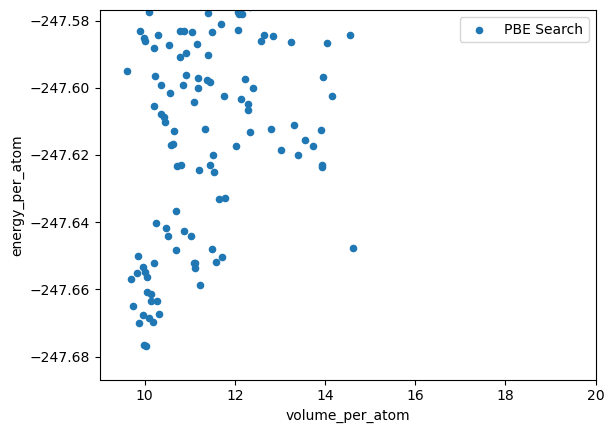

In [5]:
ax = df_dft.plot.scatter('volume_per_atom', 'energy_per_atom', 
                         xlim=(9, 20), ylim=(-434, -433.75),
                         label='PBE Search')
ax.set_ylim(df_dft.energy_per_atom.min() - 0.01, df_dft.energy_per_atom.min() + 0.1)

ax.legend(loc=1)

In [6]:
df_dft.iloc[:10]

,atoms,label,energy,energy_per_atom,volume,volume_per_atom
259,"(Atom('Li', [0.464200415515139, 0.806005412907...",LiN2-230326-191233-0e0121,-2229.09165,-247.676850,90.167346,10.018594
84,"(Atom('Li', [0.8211342071028438, -2.7536178079...",LiN2-230326-180500-a04451,-1486.05920,-247.676533,59.845918,9.974320
183,"(Atom('Li', [3.6432843142648736, 0.46810773877...",LiN2-230326-200436-4cafc9,-4458.06073,-247.670041,177.804116,9.878006
157,"(Atom('Li', [-1.5682836465659906, 2.0606335535...",LiN2-230326-160120-ac1474,-4458.05328,-247.669627,183.389009,10.188278
757,"(Atom('Li', [0.8200227579998184, -2.004455, 1....",LiN2-230326-195109-76ec78,-1486.01145,-247.668575,60.607537,10.101256
13,"(Atom('Li', [-0.6487695011556658, 1.3150330382...",LiN2-230326-172214-daf21e,-2972.01323,-247.667769,119.430416,9.952535
549,"(Atom('Li', [-3.589240200334348, -0.6053687311...",LiN2-230326-165501-91a048,-2229.00526,-247.667251,92.847094,10.316344
422,"(Atom('Li', [1.0164144493500569, -1.2476813873...",LiN2-230326-165849-8e77e6,-2971.97884,-247.664903,116.887300,9.740608
395,"(Atom('Li', [-1.1885481469229233, 1.5212395811...",LiN2-230326-180331-4c8ad0,-2971.96242,-247.663535,123.193815,10.266151
656,"(Atom('Li', [-0.07250606256094344, 0.129837491...",LiN2-230326-202717-e1d113,-2228.97117,-247.663463,91.207478,10.134164


In [7]:
df_m3g.iloc[:10]

,atoms,label,energy,energy_per_atom,volume,volume_per_atom
243,"(Atom('Li', [-0.007339897716549133, -1.9975409...",LiN2-230326-184413-7bd336,-58.6544,-6.517156,125.633568,13.959285
244,"(Atom('Li', [1.317638279490771, 3.424440606088...",LiN2-230326-194612-54678e,-58.6484,-6.516489,121.377191,13.486355
362,"(Atom('Li', [-0.20008694125554832, -2.50068502...",LiN2-230326-185417-30decd,-58.5923,-6.510256,114.443558,12.715951
415,"(Atom('Li', [4.634037673826224, -0.40509245251...",LiN2-230326-151732-ed7287,-58.5717,-6.507967,118.316658,13.146295
381,"(Atom('Li', [1.57083654865414, -0.642916648331...",LiN2-230326-191822-1eaa5a,-117.0257,-6.501428,238.977952,13.276553
337,"(Atom('Li', [-0.4490321955307258, -0.052984304...",LiN2-230326-170219-f3310a,-117.0236,-6.501311,237.945619,13.219201
371,"(Atom('Li', [-1.0802750420266825, 1.1103482493...",LiN2-230326-180810-1488c9,-77.9794,-6.498283,153.091401,12.757617
574,"(Atom('Li', [2.6743746797685137, 2.13634844755...",LiN2-230326-193557-34602e,-58.4642,-6.496022,122.003454,13.555939
366,"(Atom('Li', [3.3948787364474917, -0.6104367234...",LiN2-230326-180157-b8e352,-58.4599,-6.495544,121.665892,13.518432
158,"(Atom('Li', [1.6415471565807354, 0.68957012671...",LiN2-230326-170249-1247e3,-77.9296,-6.494133,164.189678,13.682473


Checking the lowest energy structures, one may find:
    
- M3GNet relaxed structures feature azide ions, while the DFT ones contains the N2 dimers.
- M3GNet relaxed structure are generally high in volume compared to the DFT results.

## Histogram comparison

Again, compare the distribution of the structures.

In [8]:
import matplotlib.pyplot as plt

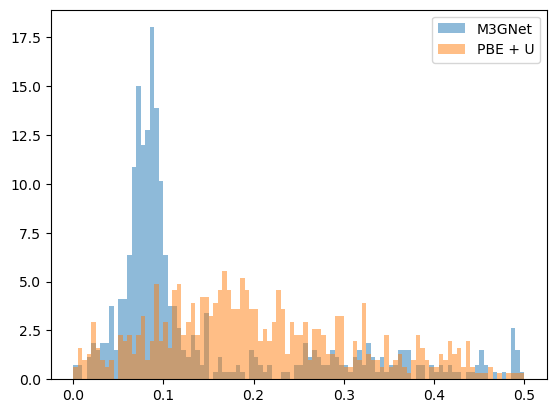

In [9]:
engs = df_m3g['energy_per_atom'].values.copy()
engs_m3g = engs -engs.min()

engs = df_dft['energy_per_atom'].values.copy()
engs_dft = engs - engs.min()

plt.hist(engs_m3g, bins=100,alpha=0.5,density=True, label='M3GNet', range=(0,0.5));
plt.hist(engs_dft, bins=100, alpha=0.5, density=True, label='PBE + U', range=(0, 0.5))
plt.legend()

It appears that in this case the M3GNet does not reproduce the PES of the DFT well, as the two distributions are vastly different.

It may seem that M3GNet has a high concentration of low energy structure, this is due to the reference energy is taken from the lowest energy structure using the same methodology. 

## Which approach finds lower energy structure

It is not possible to compare the energies directly as the DFT calculations are done with CSATEP+QC5 while the M3GNet is trained on VASP+PBE.
Can we trust the DFT energies? To some extended perhaps, because the QC5 potentials are not designed to be highly transferable but focus on the speed instead.

Here, we re-relax the structures generated from both approaches using CASTEP+C19 at 800 eV and a kpoint spacing of $0.05 \times 2\pi A^{-1}$.
*C19* is the default pseudopotential library for CASTEP, which has higher accuracy than the *QC5* used for searching, but it requires higher cut off energy..



In [10]:
input_names = list(Path("lin2/refine-run1/good_castep/").glob("*.res"))
df_dft_refine = load_dataset(input_names)

input_names = list(Path("lin2/refine-run1-m3gnet/good_castep/").glob("*.res"))
df_m3g_refine = load_dataset(input_names)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 1527.85it/s]


Text(0.5, 0, 'Volume per atom ($\\mathrm{\\AA^3}$)')

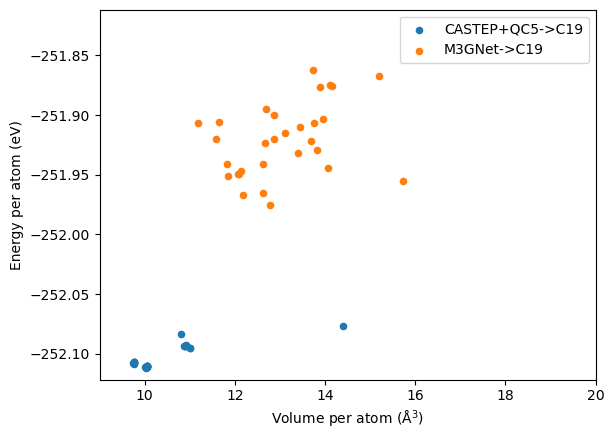

In [11]:
ax = df_dft_refine.plot.scatter('volume_per_atom', 'energy_per_atom', label='CASTEP+QC5->C19')
ax = df_m3g_refine.plot.scatter('volume_per_atom', 'energy_per_atom',  xlim=(9, 20), label='M3GNet->C19', ax=ax, color='C1')
ax.set_ylim(df_dft_refine.energy_per_atom.min() - 0.01, df_dft_refine.energy_per_atom.min() + 0.3)
ax.legend(loc=1)
ax.set_ylabel('Energy per atom (eV)')
ax.set_xlabel(r'Volume per atom ($\mathrm{\AA^3}$)')

Is this consistent with the literature? Turns out the phase diagram of Li-N has indeed been studied previsouly:

- Shen, Y., Oganov, A., Qian, G. et al. Novel lithium-nitrogen compounds at ambient and high pressures. Sci Rep 5, 14204 (2015). https://doi.org/10.1038/srep14204

However, while there are theoretical structure being predicted to be stable, they are not not included in the Materials Project dataset.

### Bonus - Machine Learning Potenital accelerated search for the the Li-N composition space

Using M3GNet for geometry optimisation would certainly miss the $\ce{LiN2}$ ground state. This is not surprising because there is no similar structures in the training set. 

But can MLPs accelerate AIRSS? A search of Li-N phase space using the recent developed [Ephemeral data derived potentials](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.106.014102) can reproduce the convex hull of Shen et al 2015 above at ambient pressure, but there are also some intriging new phases found including $\ce{Li3N4}$  🤔🤔.

In this example, the potentials are iteratively built using DFT energies of randomly generated structures. It still at least for now we still need to pay the price of DFT. The training data involves ~ 60k DFT singlepoint energy of small unit cells. This might sound a lot, they are roughly similar to the cost of just 1200 geometry optimisation. The potential built should be able to cover the entire composition space and allow sampling of larger unit cells.

![](hull-li-n.png)